In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

death_df = pd.read_csv(csv_url)

print(death_df[death_df.location == 'World'].tail())



        iso_code  ... excess_mortality_cumulative_per_million
148921  OWID_WRL  ...                                     NaN
148922  OWID_WRL  ...                                     NaN
148923  OWID_WRL  ...                                     NaN
148924  OWID_WRL  ...                                     NaN
148925  OWID_WRL  ...                                     NaN

[5 rows x 67 columns]


0. Make sure that the date column is a Pandas datetime object. Groupby date, and sum the number of deaths per date. Also fill all missing values with 0.

In [3]:
death_df.date = pd.to_datetime(death_df.date)
death_df = death_df[death_df.location == 'World'][['date', 'total_deaths','total_cases']]
death_df.fillna(0, inplace=True)
print(death_df.date.dtype)
print(death_df.head())

datetime64[ns]
             date  total_deaths  total_cases
148218 2020-01-22          17.0        557.0
148219 2020-01-23          18.0        655.0
148220 2020-01-24          26.0        941.0
148221 2020-01-25          42.0       1434.0
148222 2020-01-26          56.0       2118.0


1. Use Matplotlib or Pandas to plot the total number of deaths over time globally from the 1st of Jan 2020 until the 23rd of Dec 2021

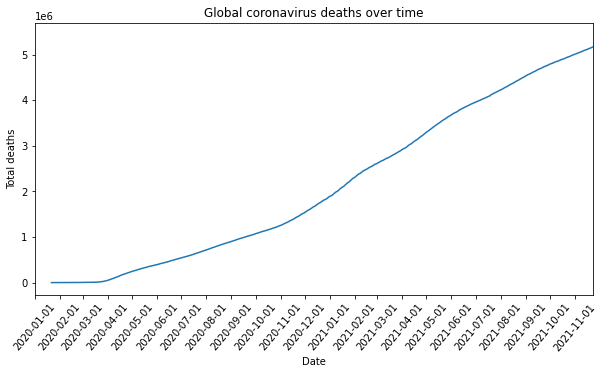

In [4]:
import matplotlib.dates as mdates 
import datetime
import matplotlib.ticker as tck

fig, axis = plt.subplots(figsize = (10, 5))
plt.xticks(rotation=50)
axis.xaxis.set_major_locator(mdates.MonthLocator())
axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(death_df.date, death_df.total_deaths)
plt.xlim([datetime.date(2020, 1, 1), datetime.date(2021, 11, 23)])
plt.title('Global coronavirus deaths over time')
plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.show()

**Linear Regression model predicting the number of global coronavirus deaths**

2. Use scikit-learn to train a Simple Linear Regression model predicting the number of global coronavirus deaths over the time period of when the first death occurred until the 23rd of Dec 2021. Fill all NaN values with 0. Plot the predictions of the model in a graph together with the true number of cases.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
model = LinearRegression()
X = death_df[['total_cases']]
model.fit(X, death_df.total_deaths.values.reshape(-1, 1))
preds = model.predict(X)

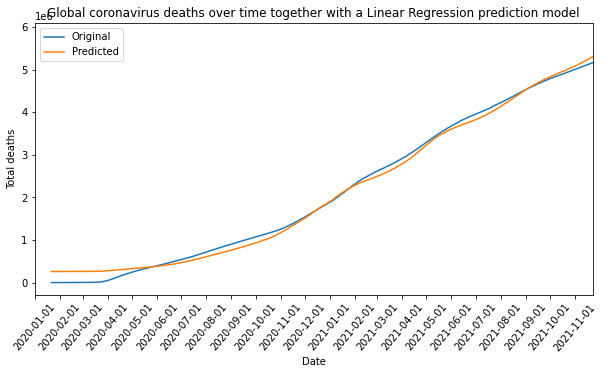

In [8]:
fig, axis = plt.subplots(figsize = (10, 5))
plt.xticks(rotation=50)
axis.xaxis.set_major_locator(mdates.MonthLocator())
axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(death_df.date, death_df.total_deaths)
plt.plot(death_df.date, preds)
plt.xlim([datetime.date(2020, 1, 1), datetime.date(2021, 11, 23)])
plt.title('Global coronavirus deaths over time together with a Linear Regression prediction model')
plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.legend(['Original', 'Predicted'])
plt.show()

3. Print the mean squared error of your Linear Regression model (as compared to the real values in the model training data for the whole time period).

In [9]:
print("Mean Squared Error: ",mean_squared_error(death_df.total_deaths.values.reshape(-1, 1), preds))

Mean Squared Error:  16874865042.939367


**South Korea Analysis**

Train any Regression model of your choice on the number of COVID19 deaths in South Korea. 

In [10]:
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

death_df2 = pd.read_csv(csv_url)

train = death_df2[(death_df2.date >= '2021-09-01') & (death_df2.date <= '2021-11-22') & (death_df2.location == 'South Korea')]
test = death_df2[(death_df2.date > '2021-11-22') & (death_df2.date <= '2021-11-29') & (death_df2.location == 'South Korea')]

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

print(train.head(), len(train))
print(test, len(test))


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


       iso_code  ... excess_mortality_cumulative_per_million
127038      KOR  ...                                0.000000
127039      KOR  ...                                0.000000
127040      KOR  ...                                0.000000
127041      KOR  ...                                0.000000
127042      KOR  ...                               39.025296

[5 rows x 67 columns] 83
       iso_code  ... excess_mortality_cumulative_per_million
127121      KOR  ...                                     0.0
127122      KOR  ...                                     0.0
127123      KOR  ...                                     0.0
127124      KOR  ...                                     0.0
127125      KOR  ...                                     0.0
127126      KOR  ...                                     0.0
127127      KOR  ...                                     0.0

[7 rows x 67 columns] 7


In [11]:
print(train.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 127038 to 127120
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    83 non-null     object 
 1   continent                                   83 non-null     object 
 2   location                                    83 non-null     object 
 3   date                                        83 non-null     object 
 4   total_cases                                 83 non-null     float64
 5   new_cases                                   83 non-null     float64
 6   new_cases_smoothed                          83 non-null     float64
 7   total_deaths                                83 non-null     float64
 8   new_deaths                                  83 non-null     float64
 9   new_deaths_smoothed                         83 non-null     float64
 10  total_c

In [13]:
X = train[['total_cases', 'new_cases',
       'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred','population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence','handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']]
Xtest = test[['total_cases', 'new_cases',
       'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million', 
       'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred','population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence','handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']]


model.fit(X, train.total_deaths.values.reshape(-1, 1))
pred = model.predict(Xtest)

print("Mean Squared Error: ",mean_squared_error(test.total_deaths.values.reshape(-1, 1), pred))

Mean Squared Error:  404.0039721806582


4.1 Plot the predictions together with the actual recorded deaths for the dates November 23rd to November 29th 2021, see example plot below.

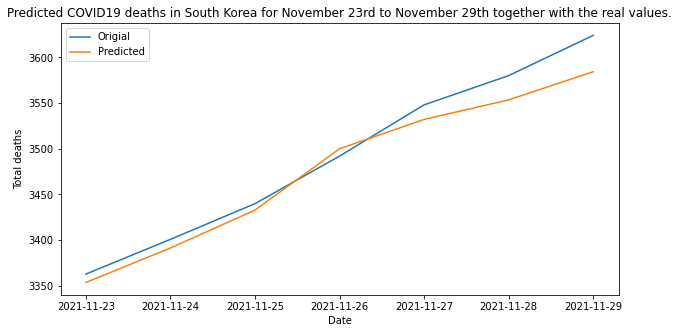

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(test.date, test.total_deaths)
plt.plot(test.date, pred)
plt.legend(['Origial', 'Predicted'])
plt.title('Predicted COVID19 deaths in South Korea for November 23rd to November 29th together with the real values.')
plt.xlabel('Date')
plt.ylabel('Total deaths')
plt.show()

4.2 Print the Mean Squared Error (MSE) of your test set predictions. Full credit is given if your model has a lower MSE than 500.

In [15]:
print("Mean Squared Error: ",mean_squared_error(test.total_deaths.values.reshape(-1, 1), pred))

Mean Squared Error:  404.0039721806582
